# Neural Network with Keras

In [1]:
import pandas as pd
import os 
import json
import json

In [2]:
# Set the seed value for the notebook so the results are reproducible
# from numpy.random import seed
# seed(42)

In [3]:
# Generate Data
national_data = pd.read_json("../../Scraping/Output/full_data.json")
national_data.columns

Index(['index', 'url', 'type_of_offer', 'type_of_prop', 'name', 'price',
       'currency', 'Estado', 'Ciudad', 'Colonia', 'Superficie total',
       'Superficie construida', 'Recamaras', 'Banos', 'Estacionamientos',
       'Antiguedad', 'Cuota mensual de mantenimiento', 'Ambientes', 'Bodegas',
       'Cantidad de pisos', 'site', 'Orientación', 'Departamentos por piso',
       'Tipo de departamento', 'Número de piso de la unidad', 'Disposición',
       'Tipo de casa', 'Tipo de propiedad', 'cp'],
      dtype='object')

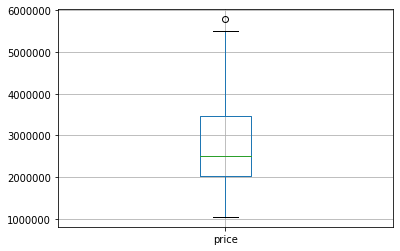

In [4]:
national_data = national_data[national_data['currency']=='MXN']
national_data = national_data[national_data['name'].str.contains('Renta')==False]
national_data = national_data[national_data['cp'].isnull()==False]

national_data = national_data[national_data['price']>1000000]
national_data = national_data[national_data['price']<10000000]
national_data = national_data[national_data['Estado']=='Puebla']
national_data = national_data[national_data['Superficie total']<300]


national_data['price'].plot.box(grid='True')

In [5]:
# Replace NA's with 0

national_data_clean = national_data.fillna(0)
national_data_clean.head()

,index,url,type_of_offer,type_of_prop,name,price,currency,Estado,Ciudad,Colonia,...,Cantidad de pisos,site,Orientación,Departamentos por piso,Tipo de departamento,Número de piso de la unidad,Disposición,Tipo de casa,Tipo de propiedad,cp
2961,1,https://departamento.metroscubicos.com/MLM-959...,sale,apartments,"Departamento En Venta En Lexum, Lomas De Angel...",2191800,MXN,Puebla,San Andrés Cholula,San Bernardino Tlaxcalancingo,...,0.0,Data\data_pbl_apartments.json,0,0.0,0,0.0,0,0,0,72820.0
2962,2,https://departamento.metroscubicos.com/MLM-959...,sale,apartments,Departamento Venta Barreal,3050000,MXN,Puebla,San Andrés Cholula,El Barreal,...,0.0,Data\data_pbl_apartments.json,0,0.0,0,0.0,0,0,0,72814.0
2963,3,https://departamento.metroscubicos.com/MLM-959...,sale,apartments,Departamento En Venta En La Paz,1650000,MXN,Puebla,Puebla,Belisario Domínguez,...,0.0,Data\data_pbl_apartments.json,0,0.0,0,0.0,0,0,0,72180.0
2964,4,https://departamento.metroscubicos.com/MLM-958...,sale,apartments,Departamento En Venta Cholula 1 Recamara / Vis...,1599000,MXN,Puebla,San Pedro Cholula,Zerezotla,...,0.0,Data\data_pbl_apartments.json,0,0.0,0,0.0,0,0,0,72764.0
2965,5,https://departamento.metroscubicos.com/MLM-944...,sale,apartments,Departamento En Venta Cerca De Upaep,1250000,MXN,Puebla,Puebla,Barrio de Santiago,...,0.0,Data\data_pbl_apartments.json,0,0.0,0,0.0,0,0,0,72410.0


In [6]:
# Changing to Boolean
national_data_clean.dtypes


index                               int64
url                                object
type_of_offer                      object
type_of_prop                       object
name                               object
price                               int64
currency                           object
Estado                             object
Ciudad                             object
Colonia                            object
Superficie total                  float64
Superficie construida             float64
Recamaras                         float64
Banos                             float64
Estacionamientos                  float64
Antiguedad                        float64
Cuota mensual de mantenimiento    float64
Ambientes                         float64
Bodegas                           float64
Cantidad de pisos                 float64
site                               object
Orientación                         int64
Departamentos por piso            float64
Tipo de departamento              

# Cleaning

In [7]:
# Replace Houses for 1 and Apartments for 0

national_data_clean = national_data_clean.replace("houses",1)
national_data_clean = national_data_clean.replace("apartments",0)
national_data_clean.head()

national_data_clean["type_of_prop"] = national_data_clean["type_of_prop"].astype(float)

In [8]:
from sklearn.model_selection import train_test_split

# Read Data

X_full = national_data_clean
# X_test_full = pd.read_csv("")

# Obtain Target and Predictions
y = X_full.price

features = ['type_of_prop',
       'Estado', 'Ciudad', 'Colonia', 'Superficie total',
       'Superficie construida', 'Ambientes', 'Recamaras', 'Banos',
       'Estacionamientos', 'Antiguedad', 'Cantidad de pisos',
       'Cuota mensual de mantenimiento', 'Bodegas']

X = X_full[features]


# Break off validation set from training data
X_train, X_valid, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [9]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['Estado', 'Ciudad', 'Colonia']


# Data Preprocessing

# One Hot Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [11]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform and Training
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Puebla'

In [12]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [13]:
X_train

,type_of_prop,Estado,Ciudad,Colonia,Superficie total,Superficie construida,Ambientes,Recamaras,Banos,Estacionamientos,Antiguedad,Cantidad de pisos,Cuota mensual de mantenimiento,Bodegas
2978,0.0,Puebla,San Andrés Cholula,San Bernardino Tlaxcalancingo,105.0,105.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
3076,1.0,Puebla,Cuautlancingo,Fuerte De Guadalupe,115.0,184.0,7.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
3027,1.0,Puebla,San Pedro Cholula,Santa María Xixitla,142.0,185.0,6.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0
3071,1.0,Puebla,Cuautlancingo,San Juan Cuautlancingo Centro,80.0,131.0,5.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
2964,0.0,Puebla,San Pedro Cholula,Zerezotla,66.0,66.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,1.0,Puebla,Ocoyucan,Chalchihuapan,200.0,200.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
3081,1.0,Puebla,Cuautlancingo,San Lorenzo Almecatla,107.0,86.0,5.0,2.0,3.0,1.0,10.0,0.0,0.0,0.0
3078,1.0,Puebla,Cuautlancingo,Nuevo León,196.0,126.0,6.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
3054,1.0,Puebla,San Pedro Cholula,Momoxpan,160.0,240.0,7.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0


In [14]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
# Defining Our Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the Model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

NameError: name 'X_train_scaled' is not defined

In [ ]:
# Quantifying the Model

# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'X_test_scaled' is not defined

In [ ]:
# Making predictions with the new data

import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")

ValueError: Error when checking input: expected dense_input to have shape (2,) but got array with shape (3,)